# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature, lbp_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, lr, reg, num_iters=1500, verbose=True)
        train_accuracy = np.mean(svm.predict(X_train_feats) == y_train)
        val_accuracy = np.mean(svm.predict(X_val_feats) == y_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
        results[(lr,reg)] = train_accuracy , val_accuracy
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 89.827001
iteration 100 / 1500: loss 88.225334
iteration 200 / 1500: loss 86.653323
iteration 300 / 1500: loss 85.115432
iteration 400 / 1500: loss 83.610792
iteration 500 / 1500: loss 82.147979
iteration 600 / 1500: loss 80.694809
iteration 700 / 1500: loss 79.263598
iteration 800 / 1500: loss 77.868426
iteration 900 / 1500: loss 76.507156
iteration 1000 / 1500: loss 75.174628
iteration 1100 / 1500: loss 73.869948
iteration 1200 / 1500: loss 72.572983
iteration 1300 / 1500: loss 71.318419
iteration 1400 / 1500: loss 70.081189
iteration 0 / 1500: loss 777.551587
iteration 100 / 1500: loss 638.173707
iteration 200 / 1500: loss 524.077517
iteration 300 / 1500: loss 430.669977
iteration 400 / 1500: loss 354.204756
iteration 500 / 1500: loss 291.592402
iteration 600 / 1500: loss 240.351087
iteration 700 / 1500: loss 198.393770
iteration 800 / 1500: loss 164.045895
iteration 900 / 1500: loss 135.928492
iteration 1000 / 1500: loss 112.903627
iteration 1100 / 1500: lo

In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.418


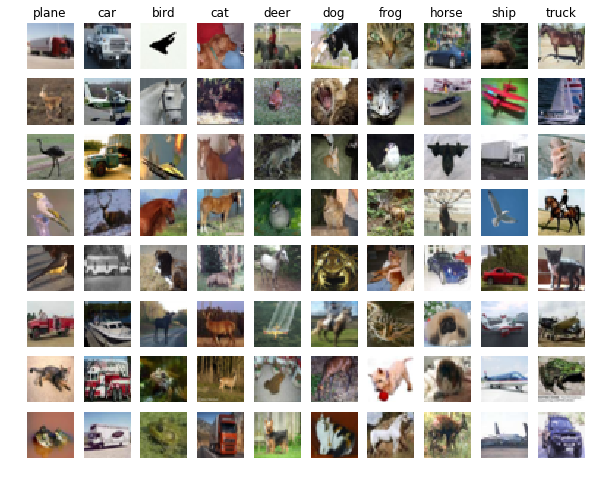

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

# Inline question 1:
1) Some same objects have similar shape, such as car and truck, it's easy to misclassified.
2) Some objects have same strong background, such as plan and ship, blue sky look like blue sea.
3) Some objects have same colour, such as dog horse and cat.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [5]:
print(X_train_feats.shape)

(49000, 155)


In [6]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
# Set parameters
# learning_rates = [1e-2 ,5e-2, 1e-1, 5e-1, 1, 5]
# regularization_strengths = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 0.5, 1]
learning_rates = [3e-1, 4e-1, 5e-1, 6e-1, 0.7]
regularization_strengths = [8e-4, 9e-4, 1e-3, 2e-3, 3e-3]
# learning_rates = [5e-1]
# regularization_strengths = [1e-3]

results = {}
best_val = -1
# Train the network
for lr in learning_rates:
    for reg in regularization_strengths:
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)
        train_accuracy = np.mean(net.predict(X_train_feats) == y_train)
        val_accuracy = np.mean(net.predict(X_val_feats) == y_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net
        results[(lr,reg)] = train_accuracy, val_accuracy
#Print out results
for lr, reg in sorted(results):
    train_acc, val_acc = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_acc, val_acc))

#Print out the best validation accuracy
print ('Best validation accuracy achieved during cross-validation: %f' % best_val) 
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.735051
iteration 200 / 2000: loss 1.334163
iteration 300 / 2000: loss 1.424799
iteration 400 / 2000: loss 1.436022
iteration 500 / 2000: loss 1.361652
iteration 600 / 2000: loss 1.318578
iteration 700 / 2000: loss 1.391306
iteration 800 / 2000: loss 1.079356
iteration 900 / 2000: loss 1.235725
iteration 1000 / 2000: loss 1.120437
iteration 1100 / 2000: loss 1.187495
iteration 1200 / 2000: loss 1.168838
iteration 1300 / 2000: loss 1.099529
iteration 1400 / 2000: loss 1.246790
iteration 1500 / 2000: loss 1.081614
iteration 1600 / 2000: loss 1.112308
iteration 1700 / 2000: loss 1.038790
iteration 1800 / 2000: loss 1.153033
iteration 1900 / 2000: loss 1.011972
iteration 0 / 2000: loss 1.099158
iteration 100 / 2000: loss 1.159512
iteration 200 / 2000: loss 1.176515
iteration 300 / 2000: loss 1.071763
iteration 400 / 2000: loss 1.153862
iteration 500 / 2000: loss 1.015192
iteration 600 / 2000: loss 1.142132
iteration 700 / 2000: 

In [7]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.
print (best_val)
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.614
0.575


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.


# Adding local binary patterns(LBP)

By adding new function lbp_feature in feature.py, we can get the feature of texture.
So we have 3 functions...


In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins), lbp_feature]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [4]:
print(X_train_feats.shape)

(49000, 411)


#Adding 256 columns

In [5]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

pass
# Set parameters
# learning_rates = [1e-2 ,5e-2, 1e-1, 5e-1, 1]
# regularization_strengths = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
# learning_rates = [8e-2, 9e-2, 10e-2, 11e-2, 12e-2]
# regularization_strengths = [3e-4, 4e-3, 5e-3, 6e-3, 7e-3]
# learning_rates = [5e-1]
# regularization_strengths = [1e-3]

results = {}
best_val = -1
# Train the network
for lr in learning_rates:
    for reg in regularization_strengths:
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)
        train_accuracy = np.mean(net.predict(X_train_feats) == y_train)
        val_accuracy = np.mean(net.predict(X_val_feats) == y_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net
        results[(lr,reg)] = train_accuracy, val_accuracy
#Print out results
for lr, reg in sorted(results):
    train_acc, val_acc = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_acc, val_acc))

#Print out the best validation accuracy
print ('Best validation accuracy achieved during cross-validation: %f' % best_val) 

iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.302633
iteration 200 / 2000: loss 2.302479
iteration 300 / 2000: loss 2.302591
iteration 400 / 2000: loss 2.302551
iteration 500 / 2000: loss 2.302542
iteration 600 / 2000: loss 2.302220
iteration 700 / 2000: loss 2.302138
iteration 800 / 2000: loss 2.301320
iteration 900 / 2000: loss 2.298995
iteration 1000 / 2000: loss 2.292161
iteration 1100 / 2000: loss 2.284740
iteration 1200 / 2000: loss 2.262787
iteration 1300 / 2000: loss 2.224329
iteration 1400 / 2000: loss 2.195014
iteration 1500 / 2000: loss 2.107790
iteration 1600 / 2000: loss 2.061027
iteration 1700 / 2000: loss 2.044579
iteration 1800 / 2000: loss 2.038248
iteration 1900 / 2000: loss 1.970372
iteration 0 / 2000: loss 1.961499
iteration 100 / 2000: loss 1.916003
iteration 200 / 2000: loss 1.835958
iteration 300 / 2000: loss 1.817915
iteration 400 / 2000: loss 1.808318
iteration 500 / 2000: loss 1.679504
iteration 600 / 2000: loss 1.709161
iteration 700 / 2000: 

In [6]:
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.539


In [8]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

pass
# Set parameters
# learning_rates = [1e-2 ,5e-2, 1e-1, 5e-1, 1]
# regularization_strengths = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]
learning_rates = [8e-2, 9e-2, 10e-2, 11e-2, 12e-2]
regularization_strengths = [3e-4, 4e-4, 5e-4, 6e-4, 7e-4]
# learning_rates = [5e-1]
# regularization_strengths = [1e-3]

results = {}
best_val = -1
# Train the network
for lr in learning_rates:
    for reg in regularization_strengths:
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)
        train_accuracy = np.mean(net.predict(X_train_feats) == y_train)
        val_accuracy = np.mean(net.predict(X_val_feats) == y_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net
        results[(lr,reg)] = train_accuracy, val_accuracy
#Print out results
for lr, reg in sorted(results):
    train_acc, val_acc = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_acc, val_acc))

#Print out the best validation accuracy
print ('Best validation accuracy achieved during cross-validation: %f' % best_val) 

iteration 0 / 3000: loss 2.302586
iteration 100 / 3000: loss 2.299132
iteration 200 / 3000: loss 1.988920
iteration 300 / 3000: loss 1.556912
iteration 400 / 3000: loss 1.427636
iteration 500 / 3000: loss 1.277717
iteration 600 / 3000: loss 1.398470
iteration 700 / 3000: loss 1.252423
iteration 800 / 3000: loss 1.128170
iteration 900 / 3000: loss 1.120734
iteration 1000 / 3000: loss 1.149247
iteration 1100 / 3000: loss 1.039558
iteration 1200 / 3000: loss 1.182570
iteration 1300 / 3000: loss 1.167198
iteration 1400 / 3000: loss 1.046981
iteration 1500 / 3000: loss 1.146176
iteration 1600 / 3000: loss 1.107117
iteration 1700 / 3000: loss 1.329530
iteration 1800 / 3000: loss 1.106447
iteration 1900 / 3000: loss 0.983853
iteration 2000 / 3000: loss 0.959734
iteration 2100 / 3000: loss 1.098291
iteration 2200 / 3000: loss 1.064239
iteration 2300 / 3000: loss 0.982824
iteration 2400 / 3000: loss 1.022995
iteration 2500 / 3000: loss 1.084933
iteration 2600 / 3000: loss 1.067521
iteration 270

In [9]:
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.601


Setting hyperparameters learning rate: 0.11 and regularization strength: 7e-4, we can get the best model, which accuracy is more than 0.6.
hhhh

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


In [6]:
mean_image = np.mean(X_train, axis=0)

In [7]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [8]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [9]:
from cs231n.classifiers.kernel_svm import *

In [10]:
print (y_train.shape, X_train.shape, y_test.shape)
size = range(10000)
X_train_batch = X_train[size]
y_train_batch = y_train[size]
print (y_train_batch.shape, X_train_batch.shape, y_test.shape)

(49000,) (49000, 3073) (1000,)
(10000,) (10000, 3073) (1000,)


In [10]:
kp = KP()
kp.fit(X_train_batch, y_train_batch, p=3
print("accuracy：{:8.6} %".format((kp.predict(X_test) == y_test).mean() * 100))

accuracy：     3.1 %


In [12]:
from sklearn import svm

In [14]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train_batch, y_train_batch)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
print("accuracy：{:8.6} %".format((lin_clf.predict(X_test) == y_test).mean() * 100))

accuracy：    21.6 %


In [19]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_batch, y_train_batch)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
print("accuracy：{:8.6} %".format((clf.predict(X_test) == y_test).mean() * 100))

accuracy：    10.0 %


In [13]:
lin_clf_2 = svm.LinearSVC()
lin_clf_2.fit(X_train, y_train)
print("accuracy：{:8.6} %".format((lin_clf_2.predict(X_test) == y_test).mean() * 100))

accuracy：    19.5 %
